# FIT5149 S1 2022 
# Assessment 1: Customer Churn Prediction


Student information
- Family Name: Thanomkul
- Given Name: Napoj
- Student ID: 32338589
- Student email: ntha0016@student.monash.edu

Programming Language: R 3.6.1 in Jupyter Notebook

R Libraries used:
- ggplot2 for data visualisation in EDA section
- psych for getting the descriptive statistic for the dataset
- gridExtra for a separation of EDA visualisation 
- caret for some machine learning algorithms and confusionMatrix of analysis
- e1071 using along with caret
- dplyr for data manupulation or piping the data
- corrplot for visualising the correlation result
- glmnet for creating a logistic regression model
- performanceEstimation for using SMOTE algorithm for unbalanced classification problems
- broom for tidy up the summary of the model
- car for Variance Inflation Factor for multicollinearity identification
- MASS for creating a Quadratic Disciminant Analysis Model
- scales for scaling the result of the analysis as percentages

## Table of Contents

1. [Introduction/Import libraries](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

## 1. Introduction / Import necessary libraries <a class="anchor" id="sec_1"></a>

This assignment will cover on building a Machine Learning(ML) model for customer churn prediction. In order to make a model for prediction, the task will be done with the following process:

1. Exploratory Data Analysis (EDA): In this process, the training dataset will be explored by using serveral methods such as showing a descriptive statistic for all the 20 predictors, identifying a correlation between predictors and the target variable or the correlation between the predictors, and a providing visualisation showing a distribution of predictors.
2. Methodology: Once the EDA section is done, training dataset will be separated by train-test split set approach and the split train set will get resampling due to imbalance int the outcome. Then, all of the predictors will be used in the process of feature analysis in order to identify which predictors will be used for creating a model in the next section.
3. Model Development: In this section, three types of ML model will be developed based on the selected features from the previous section and all of the following model will be used for fitting the testing dataset in the next section.
4. Results and discussion: From the previous section, all of the three models will be used for predicting the outcome of testing dataset. Once the prediction is done, one of these models will be selected as a final model based on the evaluation of performance metrics of the models. Lastly, the final model result will be summarised.
5. Conclusion: The summary of all the process will be provided here with some explanations for the implementation model with the churn prediction will be provided.


In [1]:
#Install the necessary library (If it is not install)
#install.packages("psych")
#install.packages('e1071')
#install.packages("corrplot")
#install.packages("performanceEstimation")
#install.packages("car")

options(warn=-1)
#Import all the necessary library
library(ggplot2)
library(psych)
library(gridExtra)
library(caret)
library(e1071)
library(dplyr)
library(corrplot)
library(glmnet)
library(performanceEstimation)
library(broom)
library(car)
library(MASS)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Loading required package: lattice

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.92 loaded
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:psych':

    logit


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'scales'

The following objects are ma

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

In the begining of Exploratory Data Analysis(EDA), the training dataset will be imported. Then, the structure of the dataset will be explored as the following:

In [2]:
#Import the training dataset for EDA and model development
train_set <- read.csv('train.csv')

In [3]:
#Looking at the first 6 rows of dataset and providing the dimension of the dataset
head(train_set)
paste("In the training dataset, there are",dim(train_set)[1],"rows and",dim(train_set)[2],"columns") 

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


[1] "In the training dataset, there are 6000 rows and 21 columns"

In [4]:
str(train_set)

'data.frame':	6000 obs. of  21 variables:
 $ customerID      : Factor w/ 6000 levels "0002-ORFBO","0003-MKNFE",..: 4576 3356 2156 4712 5556 5588 843 4052 4773 3853 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","N

Based on the following dataset structure shown above, it shares the following information:
- It provides 6000 rows and 21 variables (20 independent variables (predictors) and 1 dependent variable (outcome)
- Most of the predictors are categorical variables, while tenure, MonthlyCharges and TotalCharges are numerical variables.
- These independent variables can be classified as the following:
 1. Factor variables which consist of many levels such as customerID,gender,Partner,Dependents,PhoneService,Multiplelines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, and PaymentMethod
 2. Integers & number such as SeniorCitizen, tenure, MonthlyCharges and TotalCharges

By considering some of these variables, they might need some pre-processing for more convenient in analysis before moving on to the next process of the EDA which is applying some basic statistic on the dataset. These variable which need some adjustment are the following:

1. SeniorCitizen: Changing from numeric variable to factor
2. The variable which consists of "No internet Service" or "No Phone Service" as one of the level of factor: the "No xxx Service" will be change to "No" in order to make it less complicated for the next processes.

Once the processing is done, the dataset will summarise with some basic statistic such as count,min, max,and mean by applying summary() and apply() function of R as the following:

In [5]:
#Change the variable type of SeniorCitizen as a factor and Change the value of some variable with no internet/phone service value 
#to no for convenient in analysis (Wickham et al,nd; RDocumentation,nd)
train_set<-train_set %>% mutate_at(3, ~as.factor(case_when(.==0~"No",TRUE~"Yes")))%>%
mutate_at(8,~as.factor(case_when(. == "No phone service" ~ "No",. == "No" ~ "No", TRUE ~ "Yes")))%>%
mutate_at(c(10:15),~as.factor(case_when(. == "No internet service" ~ "No",. == "No" ~ "No", TRUE ~ "Yes")))


summary(train_set)

      customerID      gender     SeniorCitizen Partner    Dependents
 0002-ORFBO:   1   Female:2966   No :5026      No :3096   No :4225  
 0003-MKNFE:   1   Male  :3034   Yes: 974      Yes:2904   Yes:1775  
 0004-TLHLJ:   1                                                    
 0011-IGKFF:   1                                                    
 0013-EXCHZ:   1                                                    
 0013-MHZWF:   1                                                    
 (Other)   :5994                                                    
     tenure      PhoneService MultipleLines    InternetService OnlineSecurity
 Min.   : 0.00   No : 556     No :3464      DSL        :2045   No :4280      
 1st Qu.: 9.00   Yes:5444     Yes:2536      Fiber optic:2637   Yes:1720      
 Median :29.00                              No         :1318                 
 Mean   :32.24                                                               
 3rd Qu.:55.00                                            

Based on the summary of the dataset, it is found that the outcome(Churn) of this dataset is imbalance which need to be dealed in the methodology process due to the fact that it will affect the result of the model development. The majority of the outcome is "No", and most of the variable value is not equally distributed. Also, it is found that there is a null value in the TotalCharges column so it will be replace with the value zero for more convenient in analysis in the process.

In [6]:
#Change the na value in the any of column to zero for the analysis just in case the na exist (Tutorialkart,nd)
train_set[is.na(train_set)] = 0

After applying some basic statistic on the dataset, the next step will be the visualisation of the variables. In this task, the visualisations such as bar charts,histrogram and some tabula will be created because most of the variable are categorical and it is more convenient to identify an insight based on the frequency rate of variables and churn rate (Some ideas of eda visualisation and code are derived from combination of tutorial and some external sources [(Belcher,2022; Nugroho,2020; Sauer,2016)](#sec_8)).
The different categories of variables will be classifed as the following: demographic, services, and customer account information. In addition, the plot of correlation analysis for numerical variable and a summary of chi-square test for each categorical variables will be done to identify the association between the variables and the outcome[(Belcher,2022; Nugroho,2020)](#sec_8). 

*Note all the section which mention"derive from a tutorial week#" will be refer to the original source "An Introduction to Statistical Learning with Applications in R" book [(James et al.,2013)](#sec_8) for the model part except week2 tutorial.

Here is the result:

### 2.1 Demographic

In this sub-section, the visualisation of variables which classify as demographic information such as gender, SeniorCitizen, Partners and Departs will be created to provide an insight to identify whether they are directly or indirectly influence with with churn rate.

#### Gender & Senior vs Churn rate (Is gender or seniority influence the churn rate?)

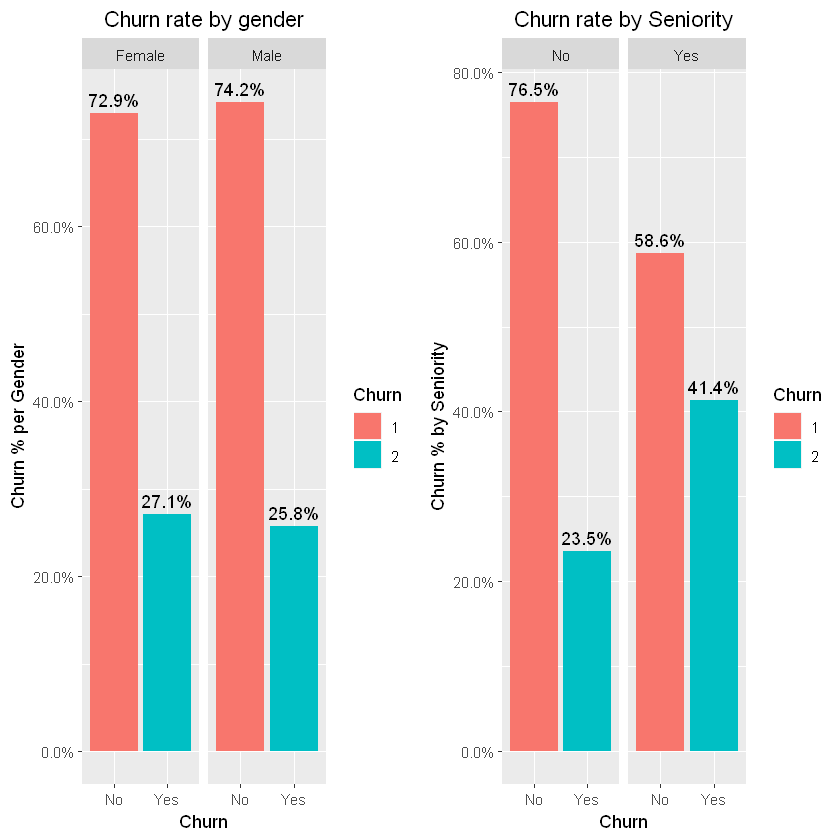

In [7]:
#Plot of the gender vs churn rate *the code with this pattern at any code chunk in the assigment is derieved from (Sauer,2016)
gender_churn <- ggplot(train_set, aes(x= Churn,  group=gender)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") + #prop is proportion of value
    geom_text(aes( label = scales::percent(..prop..), #Change the scale to percentage
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % per Gender", fill="Churn") +
    facet_grid(~gender) + #Separate the value into group by gender
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by gender")+theme(plot.title = element_text(hjust = 0.5))

#Plot of the Seniority vs Churn rate 
senior_churn <- ggplot(train_set, aes(x= Churn,  group=SeniorCitizen)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % by Seniority", fill="Churn") +
    facet_grid(~SeniorCitizen) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Seniority")+theme(plot.title = element_text(hjust = 0.5))

#Arrange the plot
grid.arrange(gender_churn,senior_churn,ncol=2)

As the following visualisation between gender/seniority and churn shown above, it can be stated that there is no differences between male or female in churn rate, and it seems that being a senior might affect the churn rate since more senior people churn; although there are less "yes" churn rate than "no". 

Next, the plot of Partner & Dependent on churn rate will be created with the same purpose as the previous plots.

#### Partner & Dependent vs Churn (is having partner or being dependent influence churn rate?)

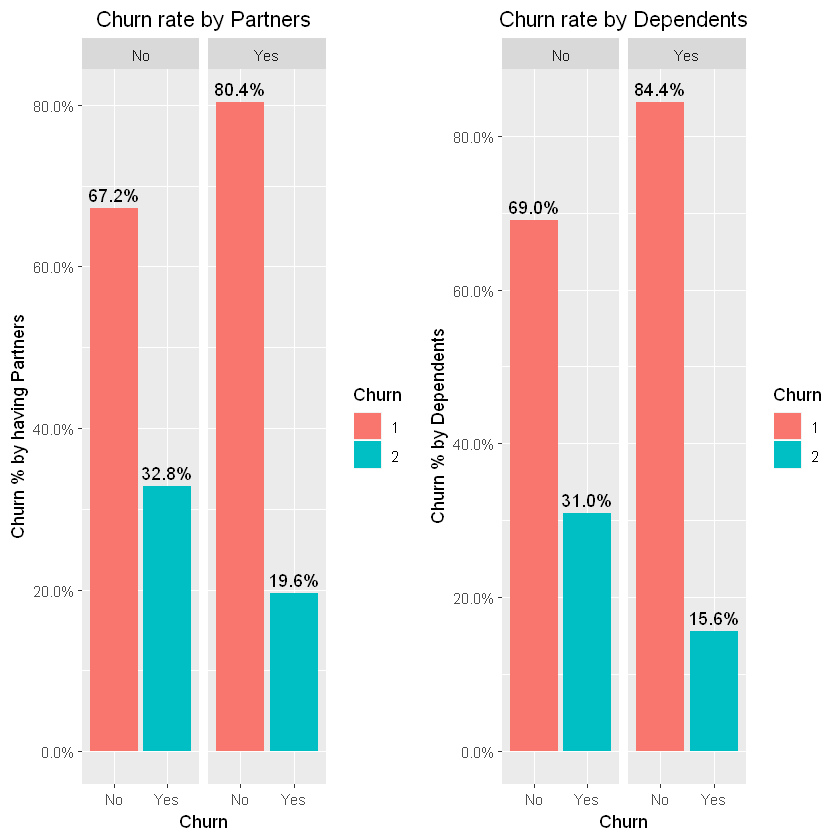

In [8]:
#Partner vs Churn rate plot  
partner_churn <- ggplot(train_set, aes(x= Churn,  group=Partner)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % by having Partners", fill="Churn") +
    facet_grid(~Partner) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Partners")+theme(plot.title = element_text(hjust = 0.5))

#Dependent vs Churn rate plot 
dependent_churn <- ggplot(train_set, aes(x= Churn,  group=Dependents)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % by Dependents", fill="Churn") +
    facet_grid(~Dependents) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Dependents")+theme(plot.title = element_text(hjust = 0.5))

#Arrange these two plots
grid.arrange(partner_churn,dependent_churn,ncol=2)

Based on these two plots, they seem to illustrate the similar pattern which are individual with no partner or not being 
dependent tend to churn more comparing to the people who does have partner and being dependent. 

### 2.2 Services

In this sub-section, the same process occured in the previous section will be performed. However, this time it will be done on the variable which is classified as the service type variable such as Phone/Internet service and the different types of these service such as Multiplelines, OnlineBackup, OnlineSecurity and the rest as the following:

#### Phone vs Internet Service (Is having these services influence the churn rate and what type of these service affect the churn rate?)

Firstly, the visualisation of the phone service and the phone service type (multiplelines), and churn rate will be plot with a similar plots to the previous section as the following:

###### Churn rate by Phone Service 

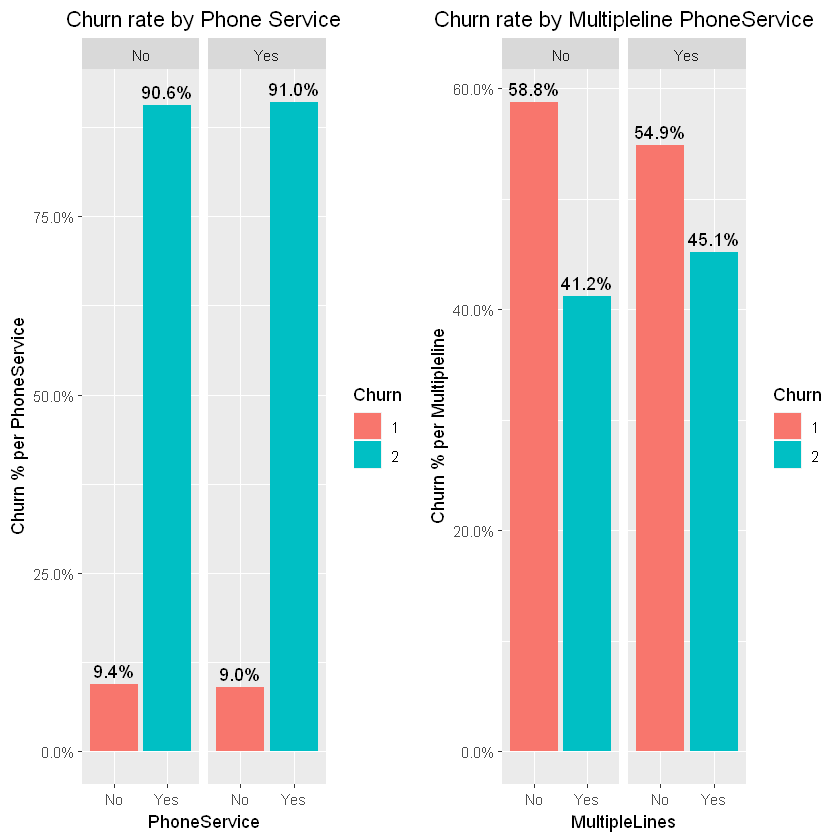

In [9]:
#Phone service vs churn rate plot 
phone_churn <- ggplot(train_set, aes(x= PhoneService,  group=Churn)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % per PhoneService", fill="Churn") +
    facet_grid(~Churn) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Phone Service")+theme(plot.title = element_text(hjust = 0.5))

# Having Multipleline vs churn rate 
phoneline_churn <- ggplot(train_set, aes(x= MultipleLines,  group=Churn)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % per Multipleline", fill="Churn") +
    facet_grid(~Churn) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Multipleline PhoneService")+theme(plot.title = element_text(hjust = 0.5))

#Plot arrangement
grid.arrange(phone_churn,phoneline_churn,ncol=2)

As the result illustrated above, it seems that both individual who have phone service and do not have a phone service have a very high churn rate around 91% of their group; while having multipleline phone service is not influence the churn rate pretty much.

After taking a look at the visualisation of phoneservice, the visualisation of the internet service and the type of the internet service on churn rate will be plot as the following:

##### Churn rate by Internet Service

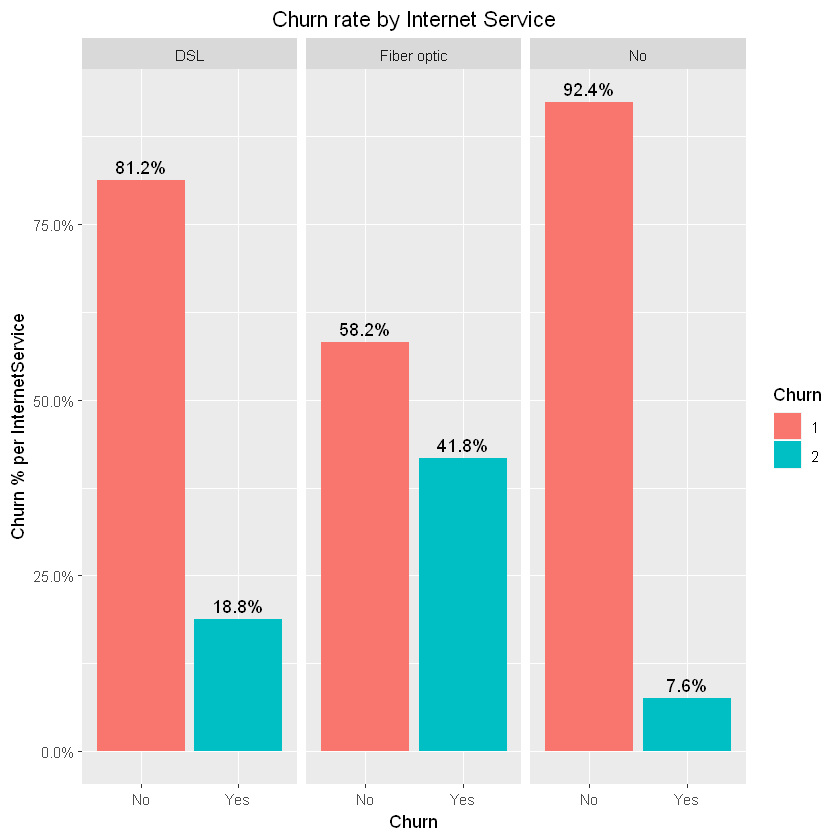

In [10]:
#Internet service vs churn rate plot 
internet_churn <- ggplot(train_set, aes(x= Churn,  group=InternetService)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % per InternetService", fill="Churn") +
    facet_grid(~InternetService) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Internet Service")+theme(plot.title = element_text(hjust = 0.5))

internet_churn

The result of the plots show that individuals who does not have internet service tend to not churn. On the other hand, 
the individuals who have internet service with fiber optic tend to churn more comparing with those who have DSL internet.

Now, it is time to take a look whether some of the internet service type influence the churn rate as shown below [(Nugroho,2020)](#sec_8):

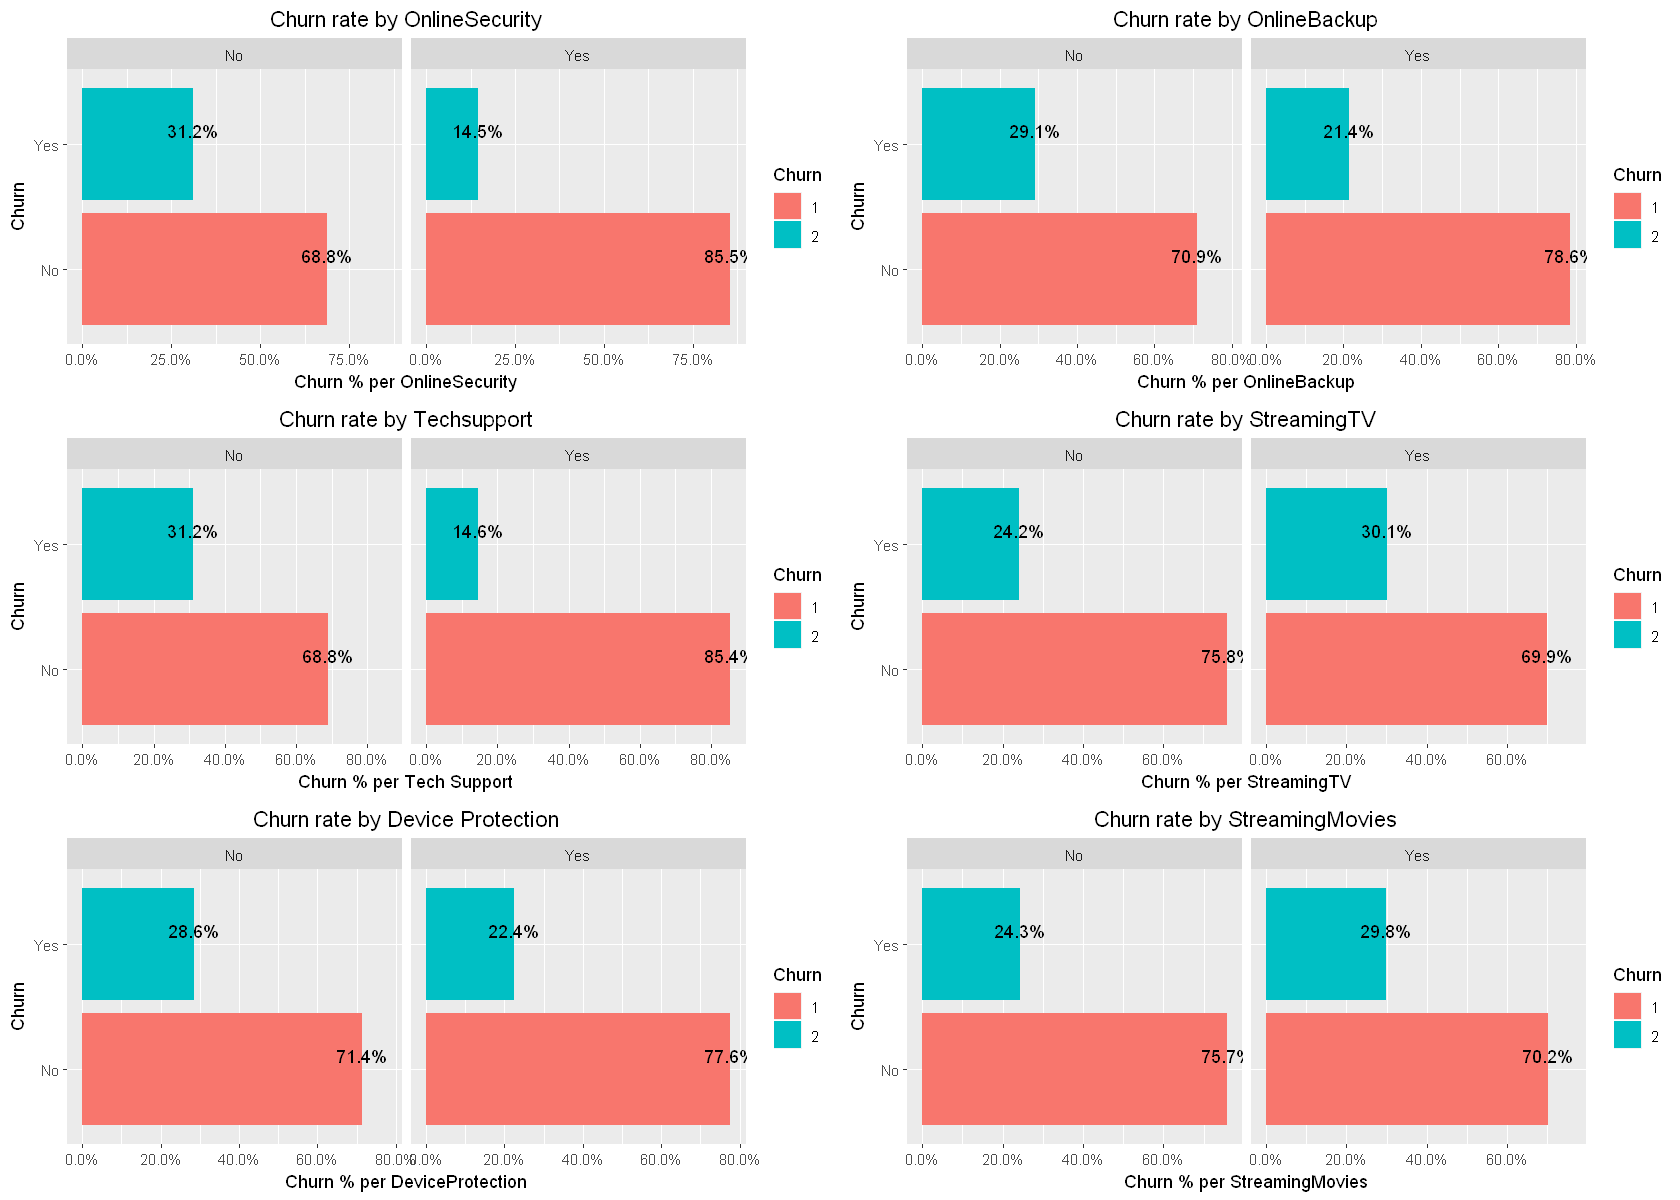

In [11]:
#Online Security user plot (Sauer,2016;Nugroho,2020)
OS<-ggplot(train_set, aes(x= Churn,  group=OnlineSecurity)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per OnlineSecurity", fill="Churn") +
    facet_grid(~OnlineSecurity) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by OnlineSecurity")+theme(plot.title = element_text(hjust = 0.5))


#Online Backup Plot
OB<-ggplot(train_set, aes(x= Churn,  group=OnlineBackup)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per OnlineBackup", fill="Churn") +
    facet_grid(~OnlineBackup) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by OnlineBackup")+theme(plot.title = element_text(hjust = 0.5))

#Device Protection Plot
DP <- ggplot(train_set, aes(x= Churn,  group=DeviceProtection)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per DeviceProtection", fill="Churn") +
    facet_grid(~DeviceProtection) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Device Protection")+theme(plot.title = element_text(hjust = 0.5))

#TechSupport plot
TS<-ggplot(train_set, aes(x= Churn,  group=TechSupport)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per Tech Support", fill="Churn") +
    facet_grid(~TechSupport) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Techsupport")+theme(plot.title = element_text(hjust = 0.5))

#StreamingTV plot
ST<-ggplot(train_set, aes(x= Churn,  group=StreamingTV)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per StreamingTV", fill="Churn") +
    facet_grid(~StreamingTV) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by StreamingTV")+theme(plot.title = element_text(hjust = 0.5))

#StreamingMovies plot
SM<-ggplot(train_set, aes(x= Churn,  group=StreamingMovies)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +coord_flip()+
    labs(y = "Churn % per StreamingMovies", fill="Churn") +
    facet_grid(~StreamingMovies) +
    scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by StreamingMovies")+theme(plot.title = element_text(hjust = 0.5))

#Arrange the plot and plot size adjustment
options(repr.plot.width=14, repr.plot.height=10) #(Cybernetic,2018)
grid.arrange(arrangeGrob(OS,OB, ncol=2, nrow=1),arrangeGrob(TS,ST, ncol=2, nrow=1),arrangeGrob(DP,SM, ncol=2, nrow=1))

The result of the internet service types and churn rate show that internet service type do not affect the increase in churn rate that much. the only difference in these plot are that individual who have StreamingTV and Streaming Movie tend to churn  comparing with individual who does not process one. Whereas the people who have Deviceprotection,Techsupport, OnlineBackup and Online security tend to churn less than the individual who have these type of services, although it is not significant. 

### 2.3 Customer Account Information

In the following sub-section, the visualisation on the customer account information and churn rate will be done with a similar 
pattern to the previous section but the only differences are the histrogram plot is added to identify the distribution of the numerical variables.

First of all, the tabula showing the summary of average of tenure rate, monthly charge, and total charge on churn rate will be provided along with the histrogram of tenure,MonthlyCharges and TotalCharges as the following.

#### Summary & Histrogram of tenure,MonthlyCharges and TotalCharges (Distribution of numerical variable)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Churn,Number of Customer,Average of tenure(month),Average of MonthlyCharge,Average of Total charge during the tenure
No,4414,37,61.25,2538
Yes,1586,18,74.32,1507


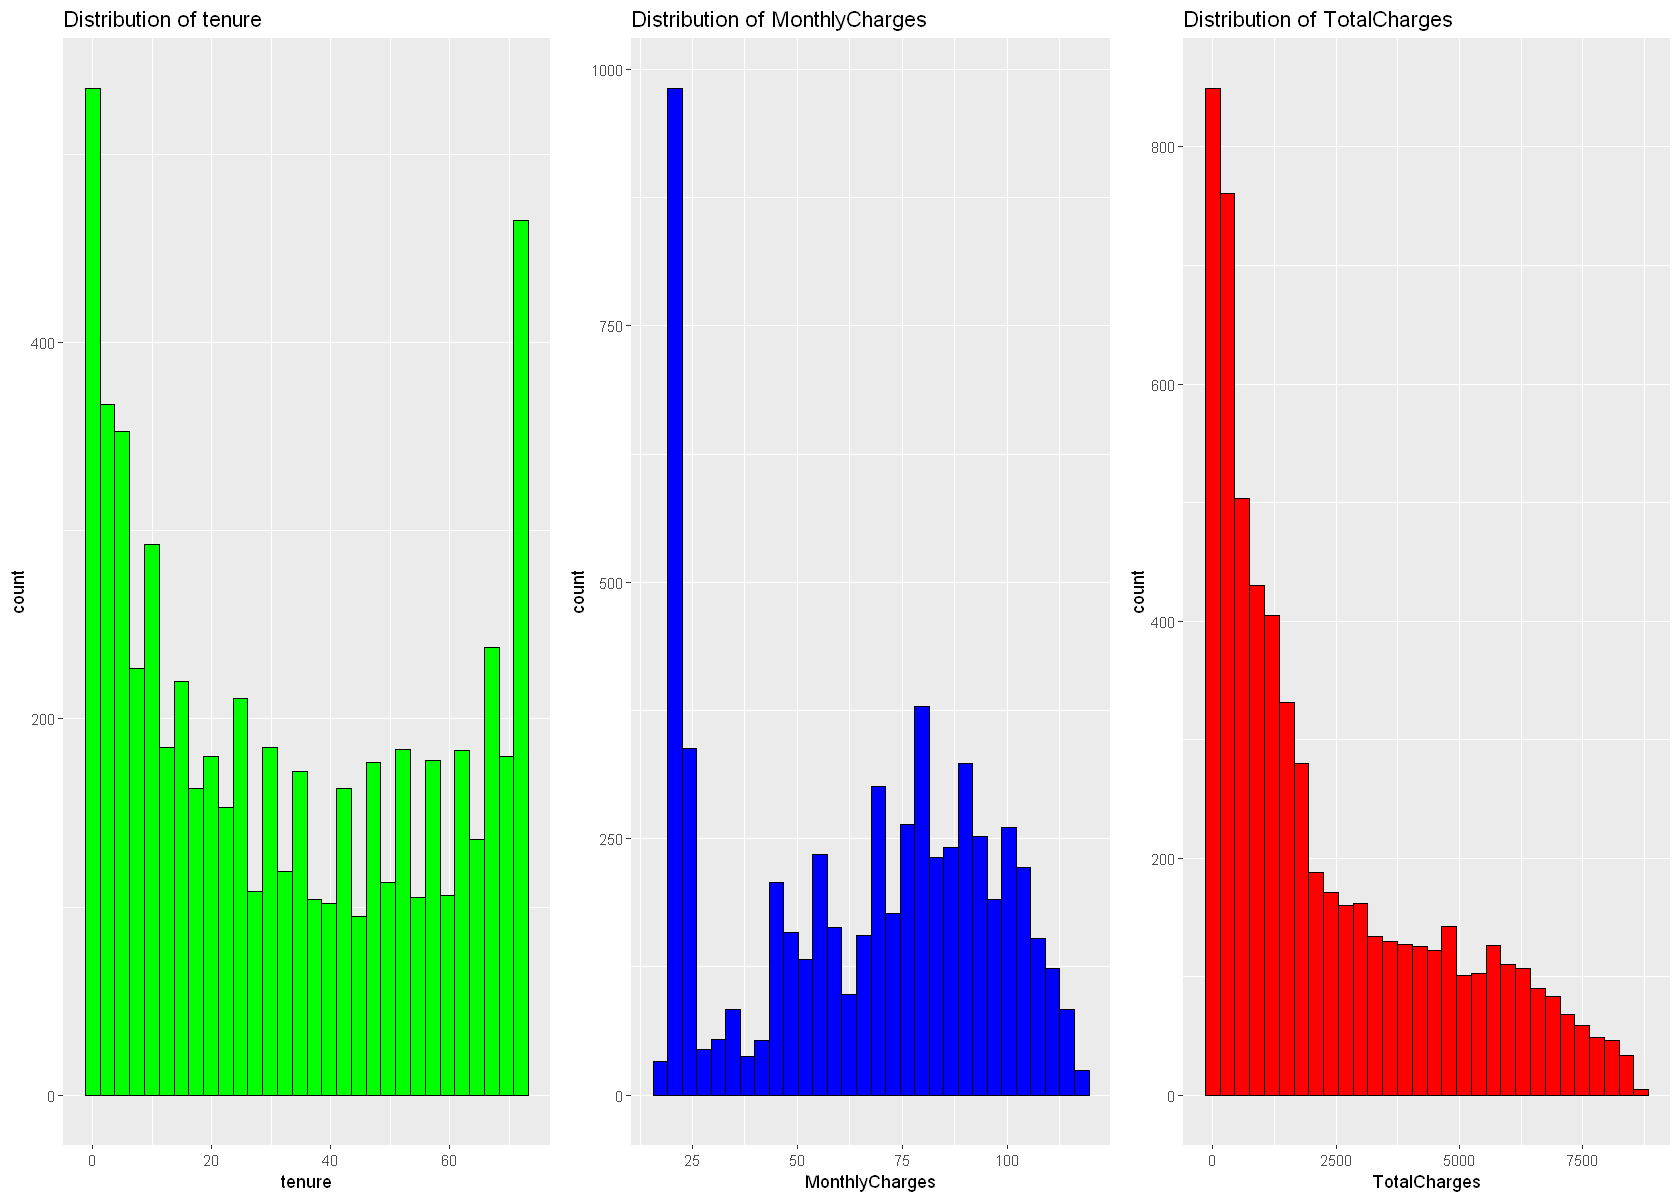

In [12]:
#Summary of the tenure,monthlycharges and totalcharges 
Customer_summary<-train_set %>% group_by(Churn) %>% summarise("Number of Customer" = n(),
                                        "Average of tenure(month)" = round(mean(tenure),0),
                                        "Average of MonthlyCharge" = round(mean(MonthlyCharges),2),
                                        "Average of Total charge during the tenure" = round(mean(TotalCharges)))

#Derived from the tutorial week 2
#Histrogram of tenure,monthlycharge, and totalcharge
tenure_plot<-ggplot(aes(x=tenure), data =train_set ) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('Distribution of tenure')

Monthly_charges_plot<-ggplot(aes(x=MonthlyCharges), data =train_set ) +
    geom_histogram(color = I('black'), fill = "Blue") + 
    ggtitle('Distribution of MonthlyCharges')

total_charge_plot<-ggplot(aes(x=TotalCharges), data =train_set ) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('Distribution of TotalCharges')

#Plot arrangement  and size adjustment
options(repr.plot.width=14, repr.plot.height=10)
grid.arrange(tenure_plot,Monthly_charges_plot,total_charge_plot,ncol=3)
Customer_summary

Based on the information from the summary and distribution from histrogram, it seems that the number of tenure,monthlycharge and totalcharge is not normalised and they are skew to the right direction. The skewness in the histrogram shown that individual tend to have a very low value of tenure,monthlycharge and totalcharges. When calculating the average, people who churn have more average monthlycharge but less average totalcharges. This result can be infered that there might be more variation in the number of monthlycharge and totalcharge for those who churn which might affect the influence of monthlycharge and totalcharge on churn rate.

#### Contact type vs Churn rate/ PaperlessBilling vs Churn rate (Is contract type/paperless billing influence churn rate) and Monthlycharge of individual with different contract type vs churn rate [(Belcher,2022)](#sec_8)

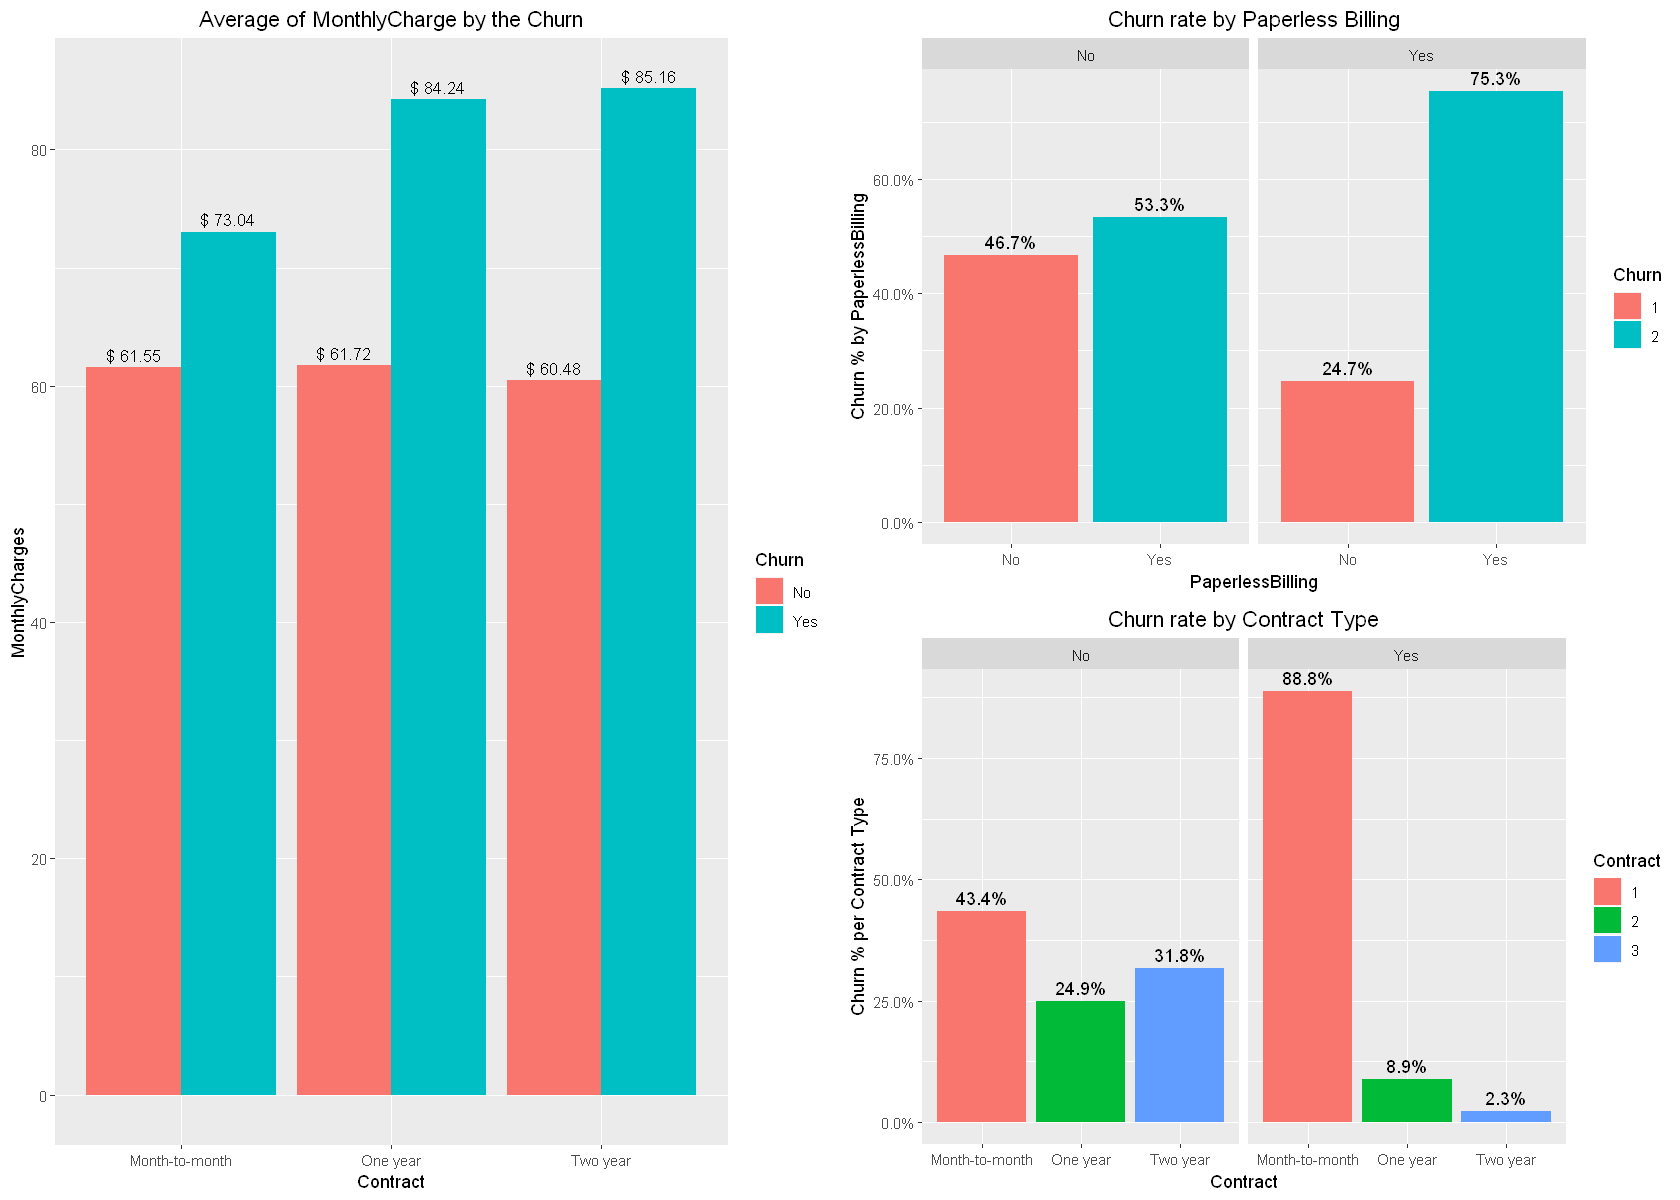

In [13]:
# Plot of Contract type by churn rate 
contract_churn <- ggplot(train_set, aes(x= Contract,  group=Churn)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % per Contract Type", fill="Contract") +
    facet_grid(~Churn) +scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Contract Type")+theme(plot.title = element_text(hjust = 0.5))

# Plot of average monthlycharge by contract type and churn rate (Belcher,2022)
charge_contract<-ggplot(train_set) + aes(x = Contract,
                   y = MonthlyCharges,fill=Churn)+geom_bar(position = "dodge", stat = "summary", fun.y = "mean") +
  stat_summary(aes(label = paste("$",round(..y..,2))), fun.y = mean, 
               geom = "text", size = 3.5, vjust = -0.5,
               position = position_dodge(width = 0.9))+scale_fill_discrete("Churn")+ggtitle("Average of MonthlyCharge by the Churn")+theme(plot.title = element_text(hjust = 0.5))

# Plot of having paperless billing vs churn rate 
paperless <- ggplot(train_set, aes(x= PaperlessBilling,  group=Churn)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % by PaperlessBilling", fill="Churn") +
    facet_grid(~Churn) +scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Paperless Billing")+theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width=14, repr.plot.height=10)
grid.arrange(charge_contract,arrangeGrob(paperless,contract_churn),ncol=2)

The result of the visualisations show that individual with month-to-month contract tend to churn more than other contract type. However, the individual who have month-to-month contract got the highest not churn rate as well. Additonal to the contract plot, the plot of contract and monthlycharge on churn rate also show that month-to-month contract individual who churn have the least average monthly charge with 73 dollars. This show that the people who got month-to-month contact might churn due to the amount of their monthlycharges. Lastly, it seems that individual who use paperlessbilling tend to churn when comparing with who does not have paperlessbilling (not show any different in churn rate).

#### PaymentMethod vs Churn rate

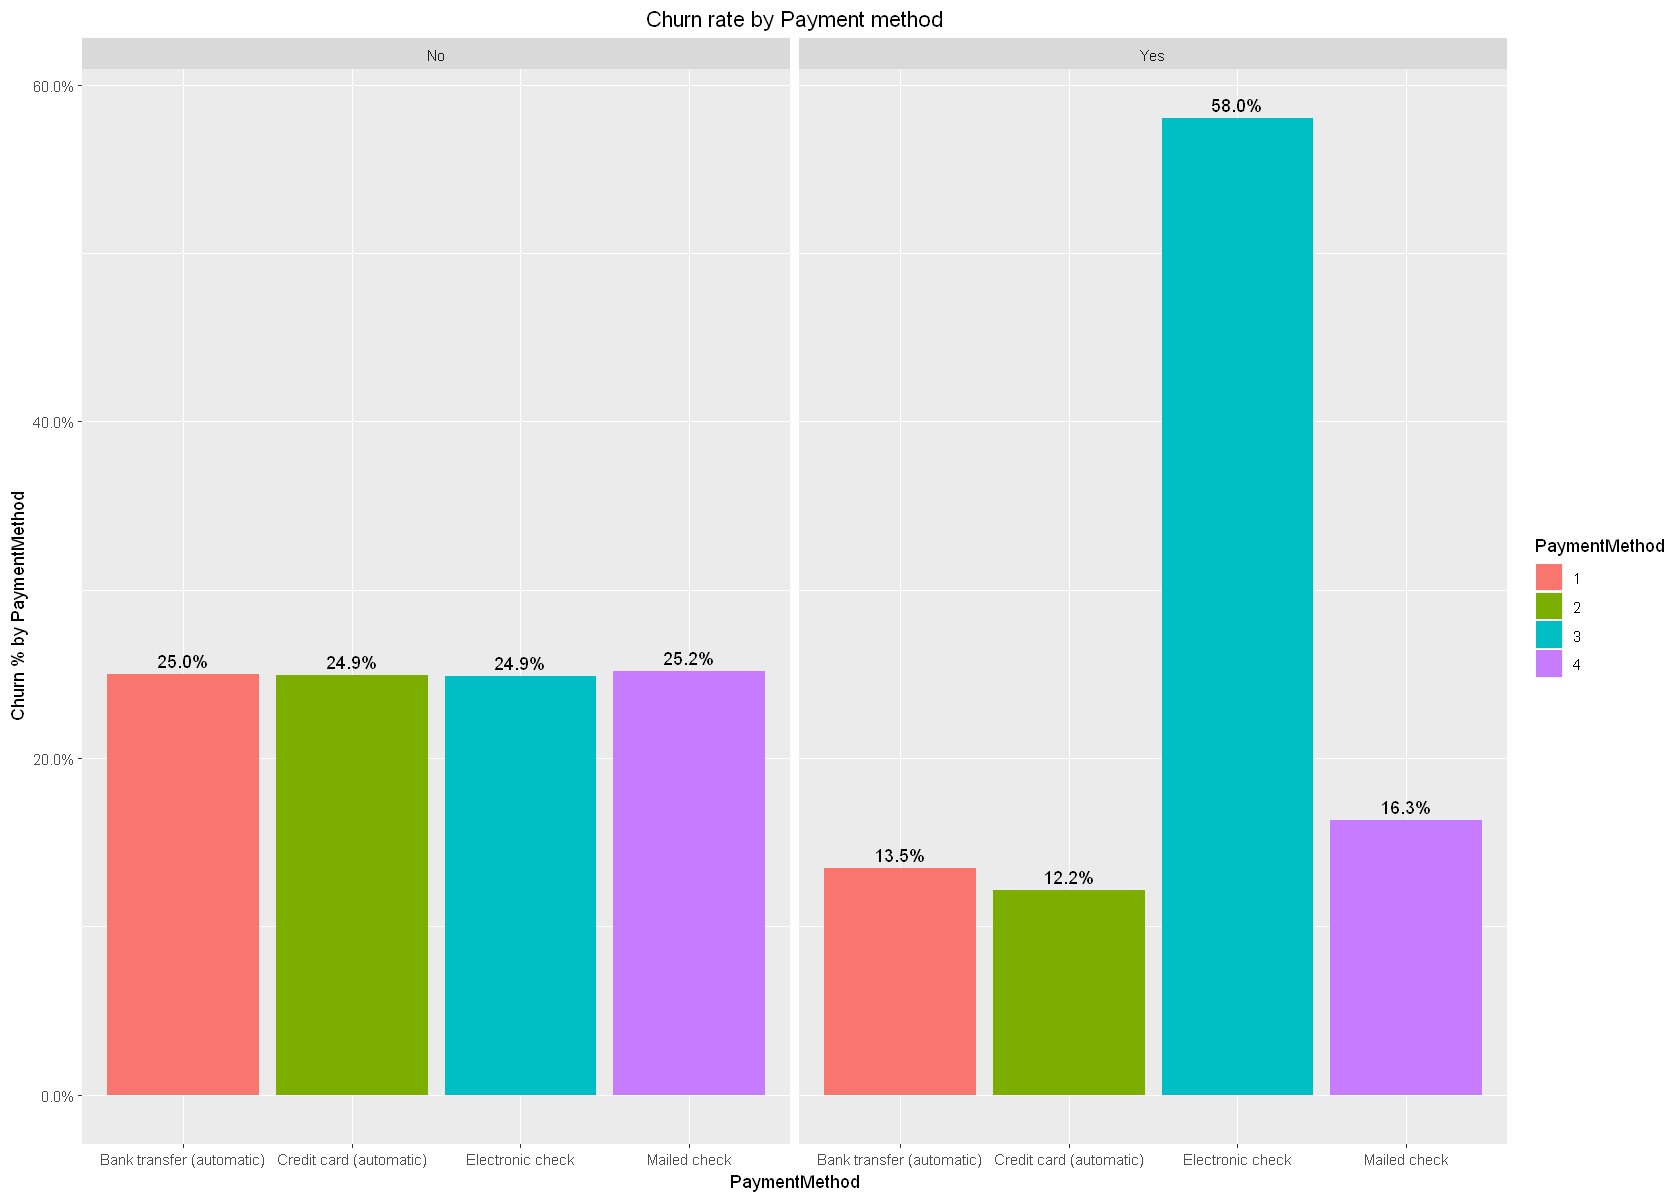

In [14]:
#Payment method on Churn 
payment <- ggplot(train_set, aes(x= PaymentMethod,  group=Churn)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Churn % by PaymentMethod", fill="PaymentMethod") +
    facet_grid(~Churn) +scale_y_continuous(labels = scales::percent)+ggtitle("Churn rate by Payment method")+theme(plot.title = element_text(hjust = 0.5))

payment

Based on the visualisation of the plot of paymentmethods and churn rate, the people who churn usually pay the charge of service by using electronic check which might influence the churn rate. 

### 2.4 Correlation between numerical variables and Independence between Categorical Variable 

For the last sub-section of EDA, the correlation plot between numerical variables and a chi-square test of independence will be performed in order to identify the association of all numerical variables and the association of categorical variable with one another. 

Note*:The reason for the separation of analysis type is due to the type of the variable and the test. The relationship between numerical variable can be identify by using correlation analysis[(Brownlee,2019b)](#sec_8), while the categorical variable require a chi-square test of independence to find an association between this kind of variable[(Brownlee,2019a;Brownlee,2019b)](#sec_8).

#### Correlation Plot between Numerical variables

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.243,0.824
MonthlyCharges,0.243,1.000,0.649
TotalCharges,0.824,0.649,1.000


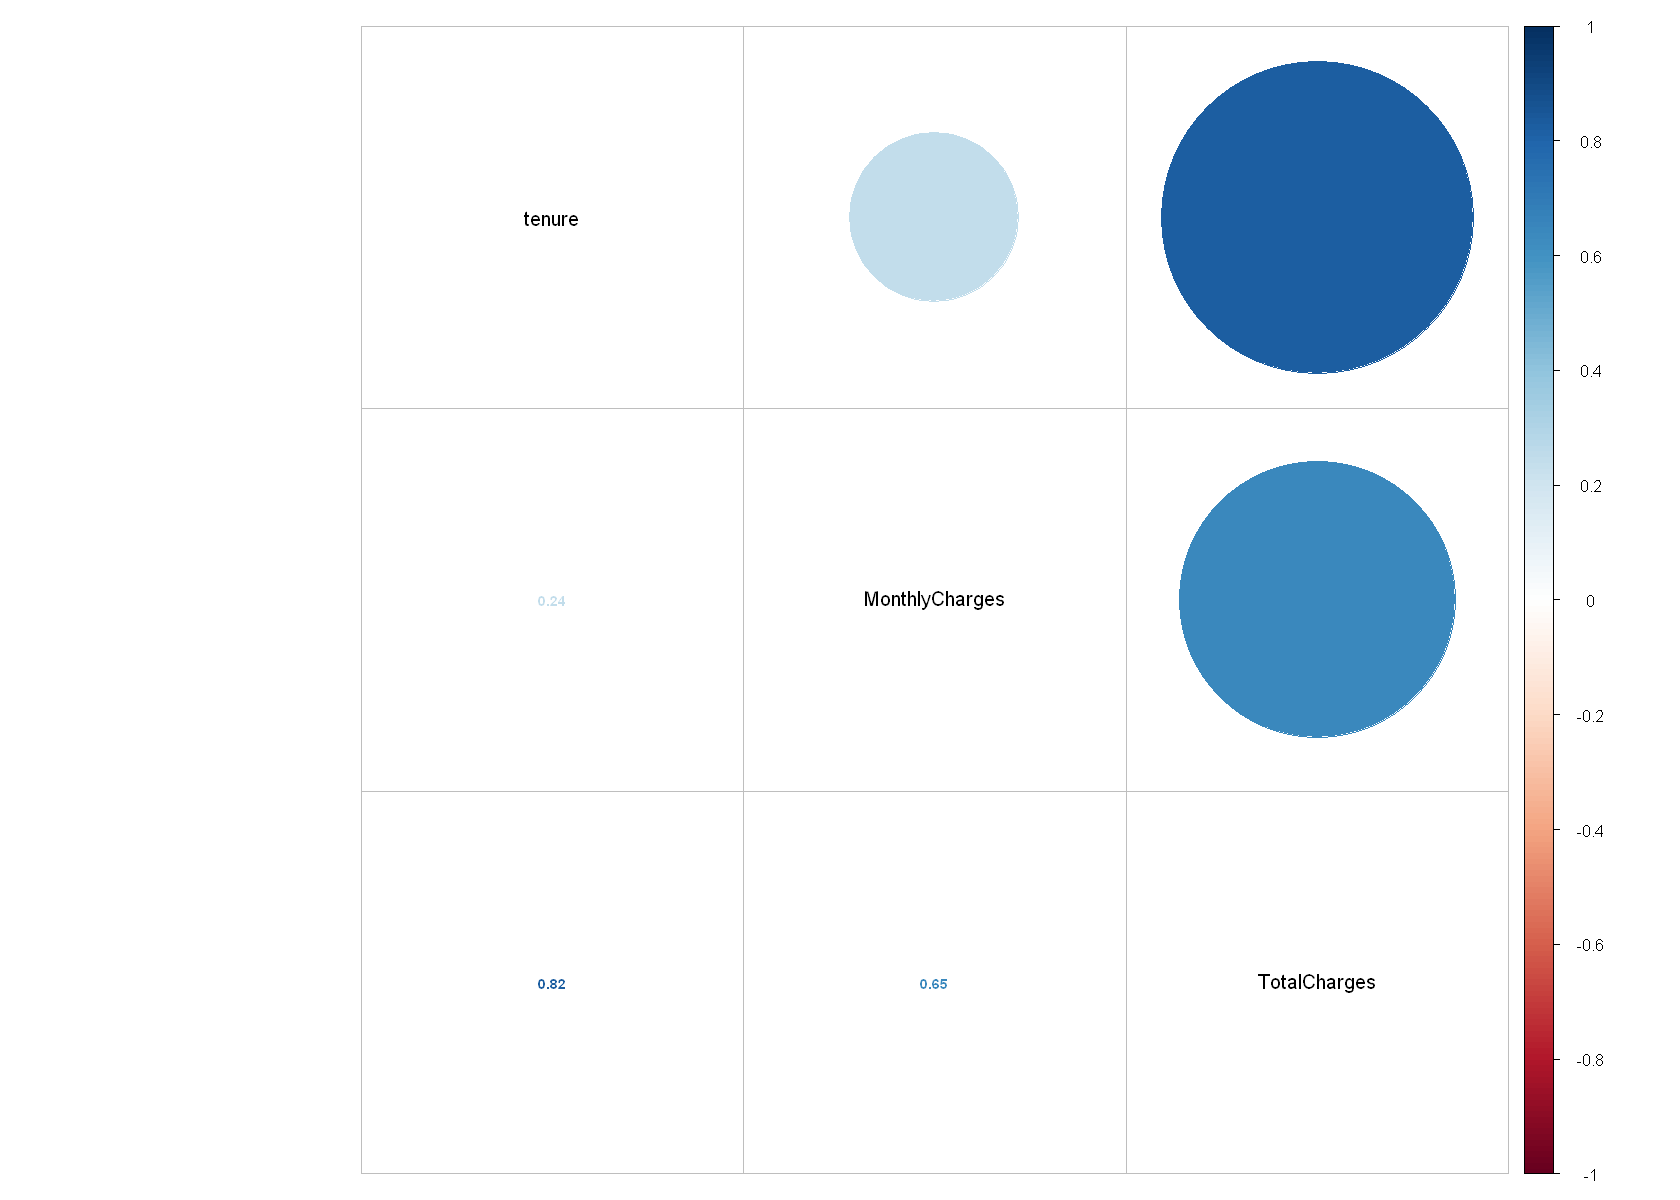

In [15]:
#Correlation analysis derived from tutorial week 2
num_cor<-round(cor(train_set[c(6,19,20)]),3)

#Plot of correlation (Nugroho,2020)
num_cor %>% corrplot.mixed(upper = "circle", tl.col = "black", number.cex = 0.7)
num_cor
#weight and height adjustment for the plot
options(repr.plot.width=10, repr.plot.height=10)

Based on the result of the correlation analysis, the TotalCharges have a very strong positive association with both tenure and MonthlyCharges, with pearson's r = 0.82 and 0.65. The result indicates that including the TotalCharges in the model development might alter the model prediction result due to a collinearity with multiple numerical variables. 

Note: peason's r score is between -1 : 1 the score with value almost reach 1 or -1 are considered as having strong relationship with outcome ,while the score which almost zero is not considered as not having a strong relationship with outcome. The score without negative sign is considered positive relationship(when variable value increase the outcome increase), whereas the score with negative sign will show the opposite result [(Rumsey,2021)](#sec_8).

After getting the result of correlation, the chi-square tests of independence wil be performed in order to identify whether the categorical variables associate with one another.

#### Chi-square test of independence 

Before the test is performed, the hypothesis of test of independence will be form as the following:
Null Hypothesis (H0): The variable is independent 

Alternative Hypothesis (H1) :The variable is dependent with the other variable

If the $p-value$ score of each variables less than 0.05, it can be interpret that the Null hypothesis is rejected and the variable is associate with another categorical variable and the outcome since it is dependent. [(Belcher,2022;Sthda,nd;Frost,nd)](#sec_8).

Here is the result:

In [16]:
#Select the column which is a factor 
category<-train_set[,sapply(train_set, is.factor) & colnames(train_set) != "customerID"]

#Apply the chi-square test for independence check (Edward,2020)
Chi_test<-lapply(category[,1:16], function(x) chisq.test(category[,17], x))
chi_tab<-do.call(rbind, lapply(Chi_test,tidy))
chi_tab$p.value <- round(chi_tab$p.value,3)
chi_tab

,statistic,p.value,parameter,method
gender,1.3020760,0.254,1,Pearson's Chi-squared test with Yates' continuity correction
SeniorCitizen,132.5892726,0.000,1,Pearson's Chi-squared test with Yates' continuity correction
Partner,133.3520455,0.000,1,Pearson's Chi-squared test with Yates' continuity correction
Dependents,151.1818430,0.000,1,Pearson's Chi-squared test with Yates' continuity correction
PhoneService,0.2036155,0.652,1,Pearson's Chi-squared test with Yates' continuity correction
MultipleLines,7.1601058,0.007,1,Pearson's Chi-squared test with Yates' continuity correction
InternetService,622.1551406,0.000,2,Pearson's Chi-squared test
OnlineSecurity,176.4018677,0.000,1,Pearson's Chi-squared test with Yates' continuity correction
OnlineBackup,40.5342688,0.000,1,Pearson's Chi-squared test with Yates' continuity correction
DeviceProtection,26.3663747,0.000,1,Pearson's Chi-squared test with Yates' continuity correction


The result shows that PhoneService and gender is independent with other categorical variables because the $p-value$ of those mentioned variables are more than 0.05. Therefore, PhoneService and gender need to be removed from being a parameter for the model development as well since it is not related to the other categorical variables and the outcome.

Regarding all the process of the EDA result, it can be implied that the variable which can be included in the model development are all the variables except TotalCharges, gender and PhoneService. However,the further feature analysis is require because it is still unclear how the remaining variable affect the churn prediction.  

## 3. Methodology<a class="anchor" id="sec_4"></a>

In the following section, it will be focus on the methodology on a pre-step before the model development which include dealing with imbalance outcome of the dataset and feature selection by using lasso regression as the following:

### 3.1 Dealing with Imbalance Class

As mentioned on the EDA section, this dataset got an imbalance result which can make an error in model prediction if this issue is not fix so some resampling technique or synthetic data generation is required. For this section, the dataset is splited into a train/test set so they can be used for fitting in the model and predict the result of the observation of the test set before fitting the real testing set on the model. However,due to the imbalance outcome of class, synthetic minority oversampling technique (SMOTE) will be used to make a balance train set. The reason for using this techinique generates an artificial random set of minority class outcome to shift the classifier learning bias towards minority class with bootstraping technique and it prevents the problem of losing information on majority of class outcome and the replicate of the data in the original set leading to overfit [(Avcontentteam,2016;Belcher;2022)](#sec_8).

In [17]:
#Split train/test set from the dataset 
set.seed(1)
index <- createDataPartition(train_set$Churn, p = 0.8, list = F)
train_split <- train_set[index,]
test_split <- train_set[-index,]

#Using Synthetic Minority Oversampling Technique (SMOTE) to balance the train dataset (RDocumentation,nd)
train_re<-smote(Churn ~., data=data.frame(train_split),perc.over=1,perc.under=2) 

#Note on the function parameter
#perc.over =A number that drives the decision of how many extra cases 
#from the minority class are generated (known as over-sampling).
#perc.under=A number that drives the decision of how many extra cases from 
#the majority classes are selected for each case generated from the minority class (known as under-sampling)

Once the spliting approach and resampling technique is done here is the comparison of the dataset:

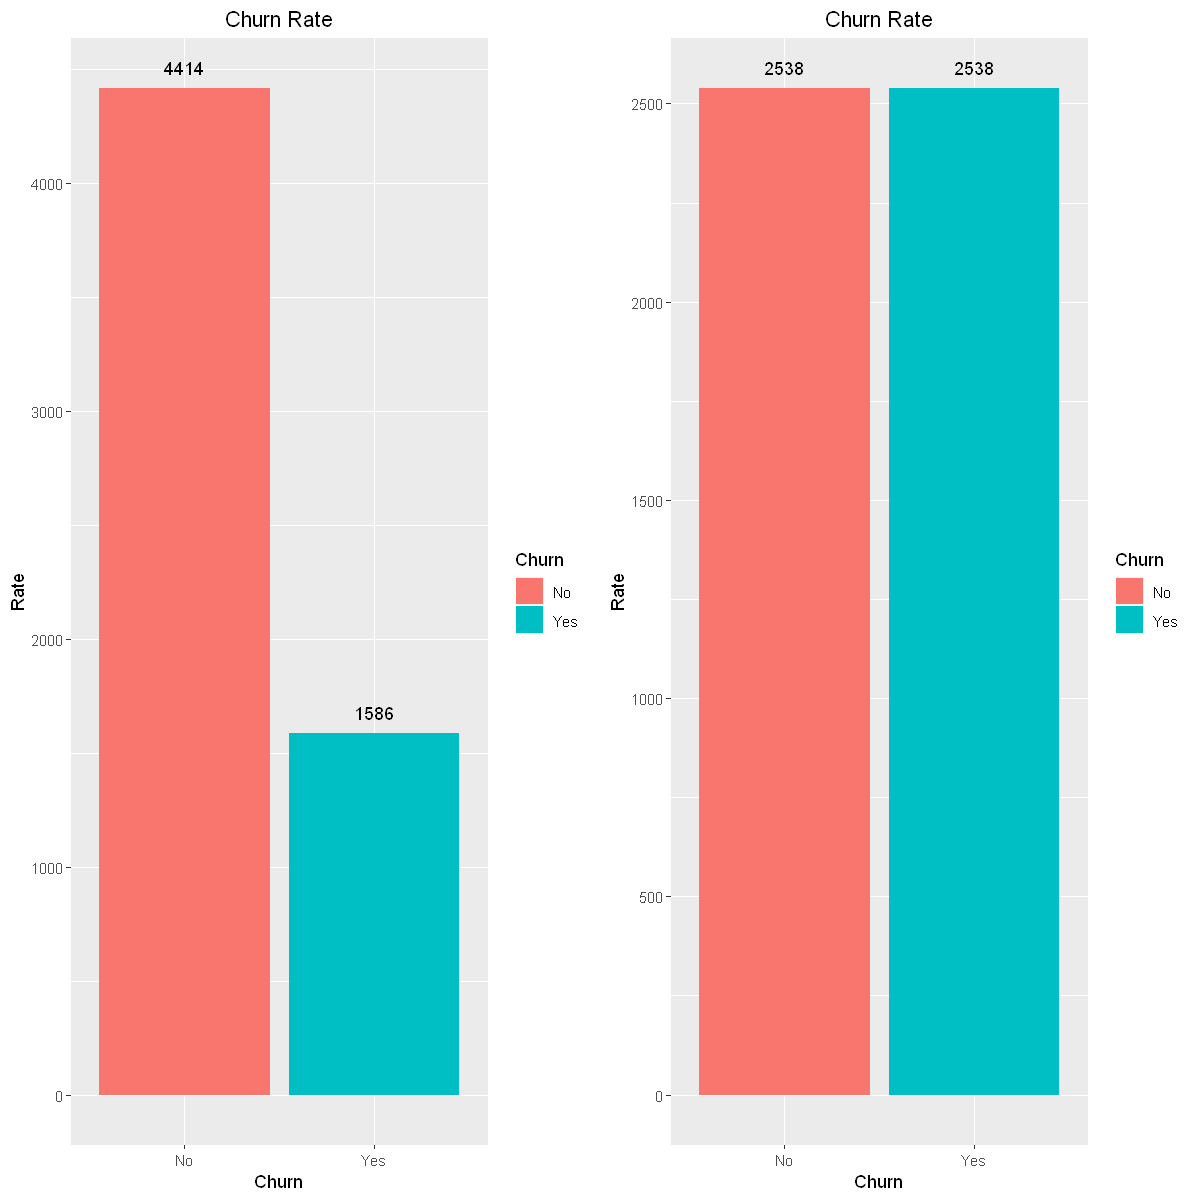

In [18]:
#Plot of the original dataset outcome 
Churn_rate<-ggplot(train_set, aes(Churn,fill=Churn)) + 
          geom_bar(aes(y = (..count..))) + geom_text(stat='count', aes(label=..count..), vjust=-1)+
          ylab("Rate") + ggtitle("Churn Rate")+theme(plot.title = element_text(hjust = 0.5))

#Plot of the train_split dataset after resampling
Churn_resamp<-ggplot(train_re, aes(Churn,fill=Churn)) + 
          geom_bar(aes(y = (..count..))) + geom_text(stat='count', aes(label=..count..), vjust=-1)+
          ylab("Rate") + ggtitle("Churn Rate")+theme(plot.title = element_text(hjust = 0.5))

#Plot araangement
grid.arrange(Churn_rate, Churn_resamp, ncol=2)

### 3.2 Feature Analysis/ Selection

Next, the feature analysis/ selection will be performed using lasso regression. This approach will automatically regularised the coefficient to zero for the unnecessary variables in predicting the observation outcome. In addition, using this technique along with a cross-validation will help with an identification of optimal $\lambda$ value for choosing the number of variables to include in any model development and minimise the error [(James et al.,2013b)](#sec_8).

#### Lasso Regression (derieved from tutorial week 6 & RDocumentation)  [(James et al.,2013b)](#sec_8)

In the first step, some variables which need to be removed mentioned in EDA section will be removed before fitting the new resampling set into the lasso regression model.

In [19]:
#Before fitting the lasso model, some variable(gender,phoneservice and total charges)will be removed.
train_set2<-train_re[,! names(train_re) %in% c("gender","PhoneService","TotalCharges")]

Next, this training set will used with model.matrix() function to created a dummy variable for categorical variable and the outcome(Churn) will be changed to numerical variable as well. The reason for change is due to the fact that glmnet() function can be operated with numerical variable only.

In [20]:
#Make a dummy variable to the categorical variable
x <- model.matrix(Churn~., train_set2[,-1])

#Make a class(churn) into numerical variable
y <- ifelse(train_set2$Churn == "Yes", 1, 0)

Once the variables is transformed, it will be fit in the lasso model with cross-validation in order to find the $\lambda$ for minimising error using cv.glmnet() with type.measure = "class" for identify the misclassification error.

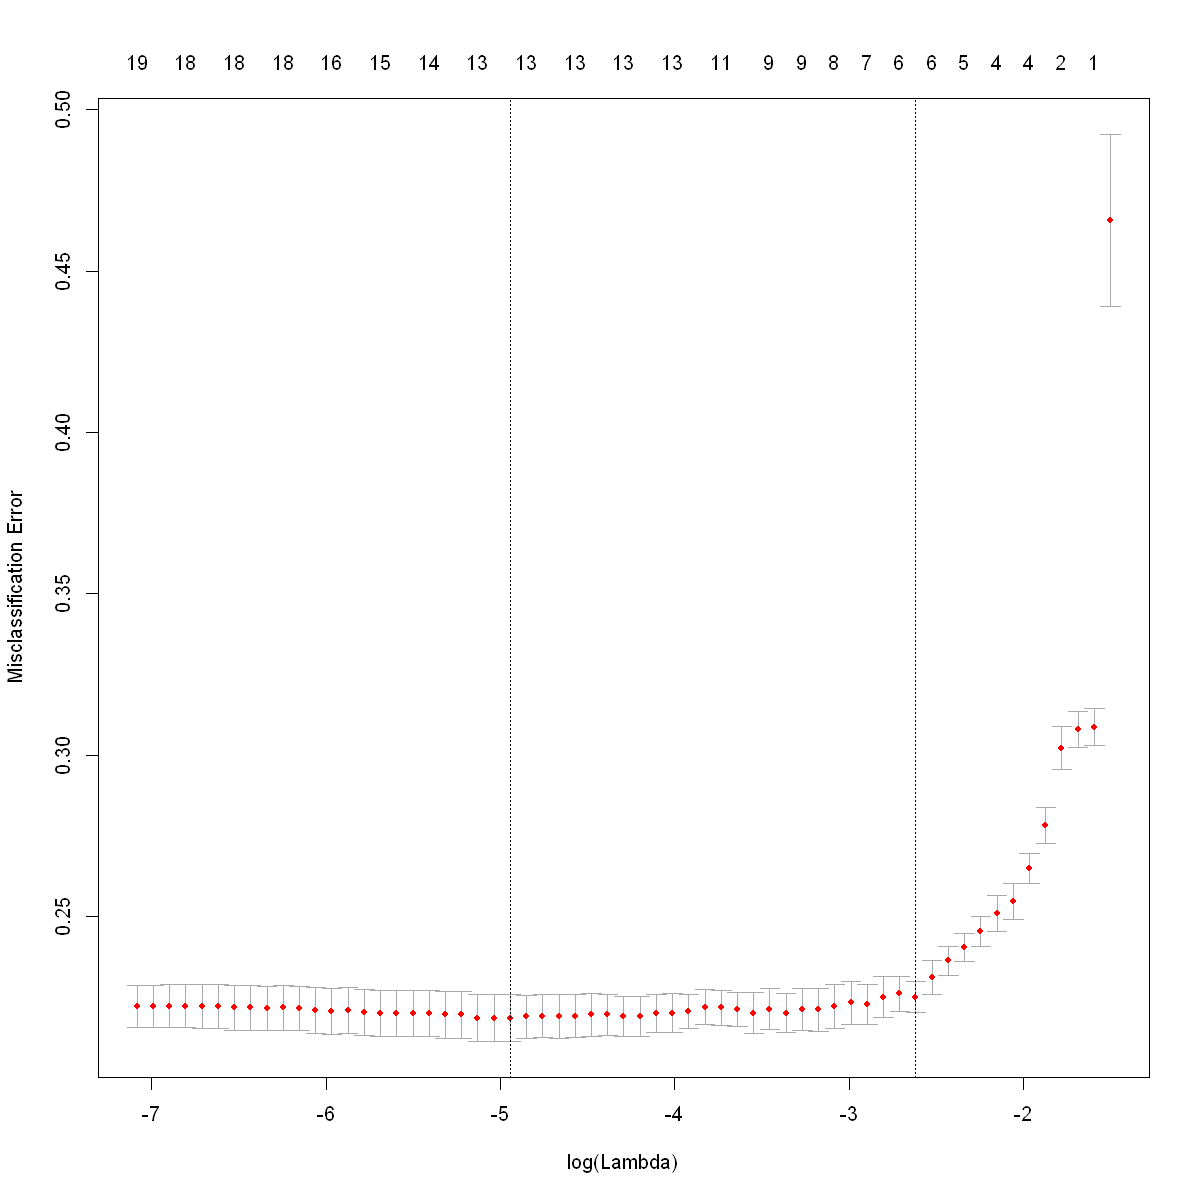

In [21]:
#Find the best lambda by using cross-validation
set.seed(1)
cv.lasso <- cv.glmnet(x, y, alpha = 1, family="binomial", standardize=TRUE,type.measure = "class") #(Rdocumentation,nd)
#Type.measure is set to class for showing the misclassification error
plot(cv.lasso)

In [22]:
#Optimal lambda 
cv.lasso$lambda.min

[1] 0.007130859

The result of the plot show that the number of variables which should be including in the model development are around 6- 13 variables this is based on the optimal $\lambda$ value which approximately 0.00713 (log -4.9) and the plot of misclassification error.

Then, the $\lambda$ from the previous step will be used for re-fitting the lasso model as the following:

In [23]:
#Fitting lasso model
lasso_model <- glmnet(x, y, alpha = 1, family = "binomial")

#Identify importance feature of this dataset from lasso
importance_feature<-predict(lasso_model, s = cv.lasso$lambda.min, type = "coefficients")[1:22,]
sort(importance_feature,decreasing=TRUE)

InternetServiceFiber optic                          (Intercept) 
                          0.70286182                           0.51624735 
       PaymentMethodElectronic check                       StreamingTVYes 
                          0.36694930                           0.25030556 
                 PaperlessBillingYes                     MultipleLinesYes 
                          0.25010965                           0.17162575 
                  StreamingMoviesYes                          (Intercept) 
                          0.14126266                           0.00000000 
                    SeniorCitizenYes                           PartnerYes 
                          0.00000000                           0.00000000 
                     OnlineBackupYes                  DeviceProtectionYes 
                          0.00000000                           0.00000000 
PaymentMethodCredit card (automatic)            PaymentMethodMailed check 
                          0.00000000                           0.00000000 
                      MonthlyCharges                               tenure 
                          0.00000000                          -0.03064462 
                       DependentsYes                    OnlineSecurityYes 
                         -0.16376015                          -0.32368211 
                      TechSupportYes                     ContractOne year 
                         -0.39259963                          -0.75684015 
                   InternetServiceNo                     ContractTwo year 
                         -0.91096786                          -1.67824622

The result shows that once the dataset is fit in the lasso model some of the variable coefficients is shirked to zero. Those zero coefficient will not be considered as a feature for the model development. In this process, the variables which will be include in the model development are the following: InternetService, PaymentMethod, StreamingTV, PaperlessBilling, MultipleLines, StreamingMovies, tenure, Dependents, OnlineSecurity, TechSupport, and Contract.  

## 4. Model Development with a training set<a class="anchor" id="sec_5"></a>

In this section, the model will be developed based on the property of the training dataset and the result from the previous section. Based on the property of dataset and the result of the earlier process, the type of model which will be developed for the churn prediction is the classification model which include all the features mentioned in the feature analysis/selection process. The model that will be developed in this section will include the following:

#### Logistic Regression (Derieved from tutorial week 4) [(James et al.,2013a)](#sec_8)

It is a model which measure the relationship between the observation outcome with one or many predictors by estimates the probabilities of using a logistic function which predict the result as 1 or 0 for the binary class classification. When considering the model function, it is one of the classification model which suitable for the prediction of churn. Here is how the logistic regression model is created:


In [24]:
#Create a logistic regression model using glm (Code derieved from tutorial week4)(James et al.,2021a)
logi_mod <- glm(Churn ~ tenure + InternetService + PaperlessBilling + PaymentMethod+StreamingTV
               +StreamingMovies+MultipleLines+Dependents+OnlineSecurity
                +TechSupport+Contract,data=train_re,family=binomial)

#Predict the outcome and display the oucome by using confusinMatrix from caret library
logi_pred<-predict(logi_mod,test_split,type = "response")
pred.logis <- rep("No", length(logi_pred))
pred.logis[logi_pred >= 0.5] <- "Yes"
confusionMatrix(table(pred.logis, test_split$Churn), positive='Yes',mode="everything")

Confusion Matrix and Statistics

          
pred.logis  No Yes
       No  657  78
       Yes 225 239
                                          
               Accuracy : 0.7473          
                 95% CI : (0.7217, 0.7717)
    No Information Rate : 0.7356          
    P-Value [Acc > NIR] : 0.1886          
                                          
                  Kappa : 0.4343          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7539          
            Specificity : 0.7449          
         Pos Pred Value : 0.5151          
         Neg Pred Value : 0.8939          
              Precision : 0.5151          
                 Recall : 0.7539          
                     F1 : 0.6120          
             Prevalence : 0.2644          
         Detection Rate : 0.1993          
   Detection Prevalence : 0.3870          
      Balanced Accuracy : 0.7494       

Once the first model is done, the multicollinearity test(Varaiance Inflation Factor) will be perform to identify whether there is a multucollinearity before moving on to the next model development. If multicollinearity is presented the feature which shown hight collinearity score will be excluded from the model features to prevent an alteration in the prediction accuracy.

Note**: The score of the 5-10 will be considered as having a collinearity but if the score is exceed 10 the feature will need to be removed, while the score less than 5 means does not have a collinearity between variable. The VIF score for categorical variable need to be square before the evaluation of score [(Fox et al., 1992;Kassambara,2018a)](#sec_8).

#### Multicollinearity test (VIF)

In [25]:
#VIF Value for categorical and numerical variable in the logistic model (Multicollinearity,nd;Kassambara,2018a)
vif(logi_mod)[, 3, drop = FALSE]**2

,GVIF^(1/(2*Df))
tenure,1.978116
InternetService,1.366269
PaperlessBilling,1.161300
PaymentMethod,1.132164
StreamingTV,1.520675
StreamingMovies,1.520480
MultipleLines,1.376687
Dependents,1.027640
OnlineSecurity,1.133976
TechSupport,1.162066


Based on the result of the model and the vif, the features does not have any collinearity and it seems that the logistic model got an approximately of 74.7% accuracy when predicting the churn rate.

#### Quadratic Discriminant Analysis (QDA) (Derieved from tutorial week 4)[(James et al.,2021a)](#sec_8)

The next model which will be developed is QDA model. This model is used for a non-linear data and it produces a quadratic decision boundary when making a prediction because one of this model property assumes that each class have their own covariance matrix. Here is how QDA model is developed:

In [26]:
#Qda model using qda function from MASS library (James et al.,2021a)
qda_mod <- qda(Churn ~ tenure + InternetService + PaperlessBilling + PaymentMethod+StreamingTV
               +StreamingMovies+MultipleLines+Dependents+OnlineSecurity
               +TechSupport+Contract,data=train_re,family=binomial)

#Prediction of the outcome using qda model
qda_pred <- predict(qda_mod,test_split)
confusionMatrix(qda_pred$class, test_split$Churn, positive="Yes",mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  613  75
       Yes 269 242
                                          
               Accuracy : 0.7131          
                 95% CI : (0.6866, 0.7386)
    No Information Rate : 0.7356          
    P-Value [Acc > NIR] : 0.9633          
                                          
                  Kappa : 0.3833          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7634          
            Specificity : 0.6950          
         Pos Pred Value : 0.4736          
         Neg Pred Value : 0.8910          
              Precision : 0.4736          
                 Recall : 0.7634          
                     F1 : 0.5845          
             Prevalence : 0.2644          
         Detection Rate : 0.2018          
   Detection Prevalence : 0.4262          
      Balanced Accuracy : 0.72

The result of the QDA model show that it is approximately 71.3% accuracy when predicting the churn which is slightly less than the accuracy percentage of logistic regression model.

#### KNN Classification

The last model which will be created is K-nearest neighbour classification model. This model will assign a class label to the new data point based on the similarity of specific group of assigned neighbour data point (K) once the model is trained. Here is how the KNN classification model developed[(Patwardhan,2021)](#sec_8):

*Note for this model, different approach in developing model is used because it will used sometimes to identify an optimal "K" for the model. As a result, the train() and control() function are used for finding an optimal solution [(Jawaharlal,2014)](#sec_8).

In [27]:
#Train the knn model with the control of cross-validation (take a few seconds to run) using the caret so we do not to
#identify the optimal k-value for knn (Jawarharlal,2014)
set.seed(1)
control <- trainControl(method="cv",number = 10,classProbs=TRUE,summaryFunction = twoClassSummary)
knn_mod <- train(Churn ~ tenure + InternetService + PaperlessBilling + PaymentMethod+StreamingTV
               +StreamingMovies+MultipleLines+Dependents+OnlineSecurity
               +TechSupport+Contract, data = train_re, method = "knn", trControl = control, preProcess = c("center","scale"), tuneLength = 20)
knn_pred <- predict(knn_mod,newdata = test_split )
confusionMatrix(knn_pred, test_split$Churn,positive="Yes",mode="everything" )

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  606  89
       Yes 276 228
                                          
               Accuracy : 0.6956          
                 95% CI : (0.6687, 0.7215)
    No Information Rate : 0.7356          
    P-Value [Acc > NIR] : 0.9991          
                                          
                  Kappa : 0.3417          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7192          
            Specificity : 0.6871          
         Pos Pred Value : 0.4524          
         Neg Pred Value : 0.8719          
              Precision : 0.4524          
                 Recall : 0.7192          
                     F1 : 0.5554          
             Prevalence : 0.2644          
         Detection Rate : 0.1902          
   Detection Prevalence : 0.4204          
      Balanced Accuracy : 0.70

The result of the KNN classifier is 69.5% in accurracy which is the least compairing with the result of the logistic regression and QDA model. However, it is still not enough to make a decision on which model should be used for predicting the churn so some evaluation on the performance metric of the model using with unseen data will be performed in the next section.

## 5. Results and discussion <a class="anchor" id="sec_6"></a>

#### Model Evaluation on Testing set

Once the models are developed, it is time to use the model to predict the outcome from a new testing set(unseen data). The process will start with pre-processing the the new testing set to be in the same format as the training set once the dataset is imported. Then, the model developed in the previous section will be used for predicting the outcome of the new testing set.

In [28]:
#Import the test.csv for the model usage
test_set <-read.csv('test.csv')

#Preprocess test_set to be the same structure as the training set
test_set<-test_set %>% mutate_at(3, ~as.factor(case_when(.==0~"No",TRUE~"Yes")))%>%
mutate_at(8,~as.factor(case_when(. == "No phone service" ~ "No",. == "No" ~ "No", TRUE ~ "Yes")))%>%
mutate_at(c(10:15),~as.factor(case_when(. == "No internet service" ~ "No",. == "No" ~ "No", TRUE ~ "Yes")))
#Change the na value in the any of column to zero for the analysis just in case the na exist
test_set[is.na(test_set)] = 0

In [29]:
#Using all the model to predict the testing set
#Logistic Regression
logi_pred_test<-predict(logi_mod,test_set,type = "response")
pred.logis.test <- rep("No", length(logi_pred_test))
pred.logis.test[logi_pred_test >= 0.5] <- "Yes"

#QDA 
qda_pred_test <- predict(qda_mod,test_set)

#KNN
knn_pred_test <- predict(knn_mod,test_set)

Next, the dataframe of these new testing set outcome prediction will be created in order to be comparing the performance of each models [(Gorelik,2014)](#sec_8).

In [30]:
#Create dataframe from confusionmatrix of each model prediction for showing the performance metric of each model (Gorelik,2014)
logis_data<-data.frame(confusionMatrix(table(pred.logis.test, test_set$Churn),positive="Yes",mode="everything")$byClass)
qda_data <- data.frame(confusionMatrix(qda_pred_test$class, test_set$Churn, positive="Yes",mode="everything")$byClass)
knn_data <- data.frame(confusionMatrix(knn_pred_test, test_set$Churn,positive="Yes",mode="everything" )$byClass)

#Data frame of Accuracy for each models on testing set (Gorelik,2014)
logis_acc<-confusionMatrix(table(pred.logis.test, test_set$Churn),positive="Yes",mode="everything")$overall[1]
qda_acc<-confusionMatrix(qda_pred_test$class, test_set$Churn, positive="Yes",mode="everything")$overall[1]
knn_acc<-confusionMatrix(knn_pred_test, test_set$Churn,positive="Yes",mode="everything" )$overall[1]

Once all the dataframe of the outcome prediction from three models are created, the performance metrics (F1-score,Precision,Recall,Specificity and Accuracy) of these models will be used to comparing with one another as a part of final model selection. 
These are the description of perfomance metric:
1. F1-score : Average of precision and recall, using in case there is an imbalance outcome in the dataset fitting in model leading to inaccurate accuracy rate (the higher the score the better the model)
2. Precision : Out of all the predicted positive value in dataset, it identifies how many predictions are truly positive
3. Recall : Out of all the actual positive value in dataset, it identifies how many predictions are identify as positive value.
4. Specificity : Out of all real negative outcome, how many of the prediction is identify as negative value.
5. Accuracy: percentage of accuracy how each model predict the outcome of the new testing set

Note:The performance metric information is derieved from "Decluttering the performance measures of classification models" [(Ambika,2020)](#sec_8)

In [31]:
#Exact F1-score, Precision, Recall and Specificity and combined all of the model performance with accuracy 
#for model selection decision

collect<-data.frame(logis_data,qda_data,knn_data)
model_com<-data.frame(t(collect))[,c(7,5,6,2)]
rownames(model_com) <- c("Logistic Regression","QDA","K-nearest neighbour")
model_com$Accuracy <- c(logis_acc,qda_acc,knn_acc)

#Convert value in the dataframe to percentage (Statistics Glob,nd)
model_com$F1 <- percent(model_com$F1)
model_com$Precision <- percent(model_com$Precision)
model_com$Specificity <- percent(model_com$Specificity)
model_com$Recall <- percent(model_com$Recall)
model_com$Accuracy <- percent(model_com$Accuracy)
print("Here is the performance metrics of all the three models:")
model_com

[1] "Here is the performance metrics of all the three models:"


,F1,Precision,Recall,Specificity,Accuracy
Logistic Regression,62.72%,53.94%,74.91%,76.18%,75.84%
QDA,61.82%,51.16%,78.09%,72.24%,73.83%
K-nearest neighbour,58.82%,49.52%,72.44%,72.50%,72.48%


When comparing all the models performance metrics, it seems that Logistic regression model produces the highest score for all of the performance metrics except Recall (second to the QDA model). Here is the interpretation of the score of the logistic regression:

1. F1 score: Logistic regression model got 62.72% it means that the model is provide a balance prediction for both positive and negative result
2. Precision: It seems that the model have a rate precision of 53.94% which is considered alright. it implies that the model provide a positive outcome and some are truly positive.
3. Recall: This model got 74.91% of predicting the model with positive out of the real positive outcome.
4. Specificity: This model provide 76.18% of predicting the model with negative outcome out of the real negative outcome.
5. Accuracy: The model is 75.84% accurately predict the outcome of the being churn.

Based on the following result, logistic regression model will be selected as the final model for predicting churn.
Here is the summary and the interpretation of the coefficient of the variables (log-odd) of the model:

*Note:log-odd value identify how increasing or decreasing the value of the predictor will influence the outcome 
*Log-odd calculate by apply exponential function to coefficient estimate [(Kassambara, 2018b;Koh,2020)](#sec_8)

#### Final Model Summary

In [32]:
#Select the final model and show the summary part of the final model
final_model<-logi_mod
final_sum<-tidy(final_model) #tidy form of model summary

#Create a log-odd score 
final_sum$logodd <- exp(final_sum$estimate)
summary(final_model)
final_sum


Call:
glm(formula = Churn ~ tenure + InternetService + PaperlessBilling + 
    PaymentMethod + StreamingTV + StreamingMovies + MultipleLines + 
    Dependents + OnlineSecurity + TechSupport + Contract, family = binomial, 
    data = train_re)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3293  -0.6972   0.1236   0.7216   2.9834  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           0.617073   0.128379   4.807 1.53e-06 ***
tenure                               -0.033985   0.002425 -14.015  < 2e-16 ***
InternetServiceFiber optic            0.674404   0.091477   7.372 1.68e-13 ***
InternetServiceNo                    -0.993707   0.132515  -7.499 6.44e-14 ***
PaperlessBillingYes                   0.278833   0.082770   3.369 0.000755 ***
PaymentMethodCredit card (automatic) -0.060653   0.124966  -0.485 0.627426    
PaymentMethodElectronic check         0.314653   0.104376   3.015 0.002573

term,estimate,std.error,statistic,p.value,logodd
(Intercept),0.61707273,0.128379420,4.8066328,1.534935e-06,1.8534944
tenure,-0.03398513,0.002424979,-14.0146047,1.269028e-44,0.9665859
InternetServiceFiber optic,0.67440381,0.091476911,7.3723937,1.675912e-13,1.9628624
InternetServiceNo,-0.99370750,0.132514686,-7.4988481,6.438111e-14,0.3702016
PaperlessBillingYes,0.27883265,0.082770013,3.3687642,7.550601e-04,1.3215862
PaymentMethodCredit card (automatic),-0.06065270,0.124966203,-0.4853529,6.274261e-01,0.9411500
PaymentMethodElectronic check,0.31465266,0.104376186,3.0146020,2.573167e-03,1.3697834
PaymentMethodMailed check,-0.09284605,0.125051970,-0.7424597,4.578089e-01,0.9113338
StreamingTVYes,0.35417188,0.091317240,3.8784777,1.051121e-04,1.4250001
StreamingMoviesYes,0.22734959,0.091228341,2.4920938,1.269925e-02,1.2552686


#### Summary from the model:

The result from the summary of the model on how each predictor affect the outcome churn prediction, which can be interpret as the following:
- Tenure (log-odd 0.966): A month increase in tenure decrease the risk of churning by 3% 
- InternetServiceFiber optic (log-odd 1.96): Individuals with fiber optic internet service are likely to churn with 96% 
- InternetServiceNo (log-odd 0.37): Customer with no internet service are 63% less likely to churn than those with dsl internet
- PaperlessBilling: (log-odd 1.32) : Customer with paperlessbilling 32% more likely to churn than those who does not have paperlessbilling
- *PaymentMethod (log-odd 1.36): Customer with Electronic Payment method is 36% more likely to churn comparing with automatic and mail check payment 
- StreamingTV (log-odd 1.42): Individuals with StreamingTV service is 42 % likely to churn than those who do not own the service 
- StreamingMovies (log-odd 1.25): Individuals with StreamingMovies service is 25% more likely to churn than people who does not own this service.
- MultipleLines (log-odd 1.32) : Customer who got a multipleline phone service is 32% more likely to churn than who does not process this service
- Dependents (log-odd 0.79): Customer who is an dependents person is 21% less likely to churn than an independent people
- OnlineSecurity (log-odd 0.67): Customer who have an OnlineSecurity service is 33% less likely to churn than people who does not have OnlineSecurity Service
- TechSupport(log-odd 0.61): Customer who got a techsupport is 39% less likely to churn  than those who do not process this service
- ContractOne year (log-odd 0.42): People who sign a one-year contract is 58% less likely to churn comparing to those who sign a month-to-month contact 
- ContractTwo year (log-odd 0.14): People who sign a one-year contract is 86% less likely to churn comparing to those who sign a month-to-month contact 

*Since the result of $p-value$ of paymentmethodmailcheck and paymentmethod (automatic) are not significant($p-value$ more than 0.05) so it is summarise as an overall with the paymentmethod variable.

## 6. Conclusion<a class="anchor" id="sec_7"></a>

Based on all of the following procedure, logistic regression model can predict the churn rate with the highest accuracy, F1-score,specificity and recall score. The predictors which affect the prediction rate are Tenure, InternetService, PaperlessBilling, PaymentMethod, StreamingTV, StreamingMovies, MultipleLines, Dependents, OnlineSecurity, TechSupport and Contract. In order to decrease the churn rate based on the result of model, the telecomunication company might need to focus on customer who got Fiber optic internet service, own StreamingTV service, did not have OnlineSecurity and TechSupport, and sign a contact in month-to-month type due to a significant level(based on summary of model with $***$ sign). The telecommunication company might need to promote the customer to sign up for OnlineSecurity and TechsSupport service may help in decreasing churn rate and take a measure to identify the actual problem of customer who own fiber optic InternetService.  

## 7. References <a class="anchor" id="sec_8"></a>

- Avcontentteam (2016, March 28th). Practical Guide to deal with Imbalanced Classification Problems in R. https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/
- Ambika, A.(2020, December 16th). Decluttering the performance measures of classification models. https://www.analyticsvidhya.com/blog/2020/12/decluttering-the-performance-measures-of-classification-models/
- Belcher, K.(2022, March 6th). Predicting Customer Churn with SMOTE | R. https://www.kaggle.com/code/kellibelcher/predicting-customer-churn-with-smote-r
- Brownlee, J. (2019a, November 25th). How to Perform Feature Selection with Categorical Data., https://machinelearningmastery.com/feature-selection-with-categorical-data/
- Brownlee, J. (2019b, November 27th). How to Choose a Feature Selection Method For Machine Learning., https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- Cybernetic. (2018, May 20th). Specify Width and Height of Plot[Comment on Stackoverflows]. https://stackoverflow.com/questions/1279003/specify-width-and-height-of-plot
- Edward. (2020, March 14th). Apply Chi-Squared Test in R on more than 5 variables and find the p-values[comment on Stackoverflows]. https://stackoverflow.com/questions/60679649/apply-chi-squared-test-in-r-on-more-than-5-variables-and-find-the-p-values
- Fox, J. and Georges M. (1992). Generalized Collinearity Diagnostics. Journal of the American Statistical Association 87 (pp 178–83). http://www.jstor.org/stable/2290467.
- FIT5149 Tutorial week 2,4 and 6
- Frost, J.(nd). Chi-Square Test of Independence and an Example. https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/
- Gorelik, B.(2014, June 22th). How to retrieve overall accuracy value from confusionMatrix in R?[comment on Stackoverflow].
https://stackoverflow.com/questions/24348973/how-to-retrieve-overall-accuracy-value-from-confusionmatrix-in-r
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013a).Classification(ch.4). An Introduction to Statistical Learning with Applications in R (pp.129-196).https://hastie.su.domains/ISLR2/ISLRv2_website.pdf.
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013b).Linear Model Selection and Regularization(ch.6). An Introduction to Statistical Learning with Applications in R (pp.225-288).https://hastie.su.domains/ISLR2/ISLRv2_website.pdf.
- Jawaharlal, V.(2014, April 29th). kNN Using caret R package. https://rpubs.com/njvijay/16444
- Kassambara. (2018a, March 11th). Multicollinearity Essentials and VIF in R. http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/
- Kassambara. (2018b, March 11th). Logistic Regression Essentials in R. http://www.sthda.com/english/articles/36-classification-methods-essentials/151-logistic-regression-essentials-in-r/
- Koh, C.(2020, July 26). Interpreting results from logistic regression in R using Titanic dataset. https://medium.com/@conankoh/interpreting-results-from-logistic-regression-in-r-using-titanic-dataset-bb9f9a1f644c
- Multicollinearity (nd). http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/4-5-Multiple-collinearity.html
- Nugroho, E. S.(2020, July 4th). Tellecomunication Churn Prediction. https://rpubs.com/ezrasote/churn
- Patwardhan, S. (2021, April 21th). Simple understanding and implementation of KNN algorithm! https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/
- Rumsey, D. J. (2021, August 7th). How to Interpret a Correlation Coefficient r. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792/
- RDocumentation.(nd). cv.glmnet: Cross-validation for glmnet. https://www.rdocumentation.org/packages/glmnet/versions/4.1-3/topics/cv.glmnet
- RDocumentation.(nd). smote: SMOTE algorithm for unbalanced classification problems. https://www.rdocumentation.org/packages/performanceEstimation/versions/1.1.0/topics/smote
- RDocumentation.(nd). case_when: A general vectorised if, https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/case_when
- Sauer, S. (2016, November 3rd). How to plot a 'percentage plot' with ggplot2. https://sebastiansauer.github.io/percentage_plot_ggplot2_V2/
- Statistics Glob.(nd). Format Number as Percentage in R (3 Examples) | Express Numeric Values in Percent. https://statisticsglobe.com/format-number-as-percentage-in-r. 
- Sthda (nd.). Chi-Square Test of Independence in R. http://www.sthda.com/english/wiki/chi-square-test-of-independence-in-r
- TutorialKart.(nd). R Data Frame – Replace NA with 0. https://www.tutorialkart.com/r-tutorial/r-dataframe-replace-na-with-0/
- Wickham, H., Francois, R., Henry, L., & Muller, K.(nd). Mutate multiple columns. https://dplyr.tidyverse.org/reference/mutate_all.html